# **THE SPARKS FOUNDATION**
# **TASK 1 - Prediction using Supervised ML**
Predict the percentage of an student based on the no. of study hours.

GRIP MARCH2021 INTERN

Author - **Ashwini Singh**

In [30]:
# Importing libraries 
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [31]:
# Reading the Data 
data=pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:

# Check if there any null value in the Dataset
data.isnull == True

False

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**There is no null value in the Dataset so, we can now visualize our Data.**

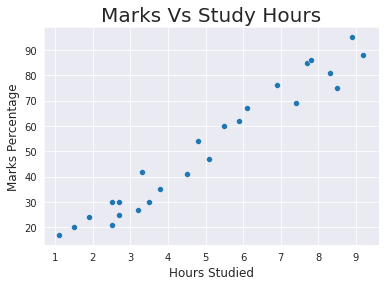

In [35]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**In the above scatter plot the correlation is seen between 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

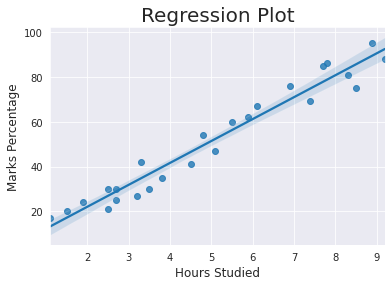

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [36]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**

# **Boxplot of our data**

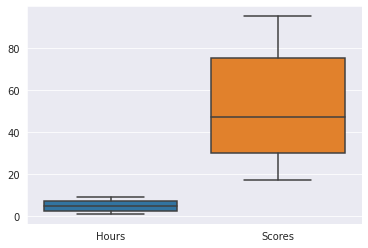

In [37]:
sns.boxplot(data=data[["Hours","Scores"]])

**Clearly there are no outliers in the data.**

# **Scatterplot of our data**

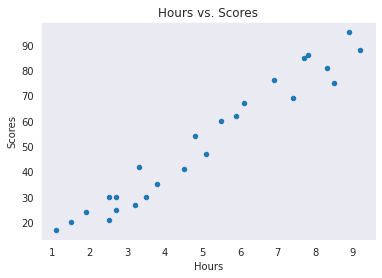

In [38]:
data.plot.scatter(x="Hours",y="Scores")
plt.title("Hours vs. Scores")
plt.grid()
plt.show()

**Clearly we can see that there is positive linear relationship between hours and scores.**

# **Training the Model**

**1) Splitting the Data**

In [39]:
#Preparing the data
# Defining X and y from the Data

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Splitting the Dataset into Train and Test
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**Here 80% of the dataset is used for training and 20% of the data for testing.**

**Now we use the training data to train our Algorithm**

In [40]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train_X, train_y) 

print("Training complete.")

Training complete.


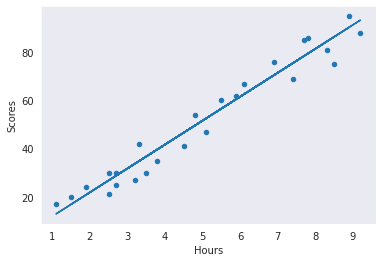

In [41]:
line = regressor.coef_*X+regressor.intercept_

data.plot.scatter(x="Hours",y="Scores")
plt.plot(X, line);
plt.grid()
plt.show()

# **Predicting the Percentage of Marks**

In [42]:
pred_y = regressor.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Comparing Actual Score vs. Predicted Score**

In [43]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Visually Comparing the Predicted Marks with the Actual Marks**

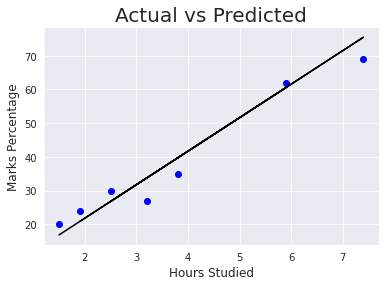

In [44]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [45]:
hours = np.array([[9.25]])
answer = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(round(answer[0],3)))


No of Hours = 9.25
Predicted Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**

# **Evaluating the Model**

In [48]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**